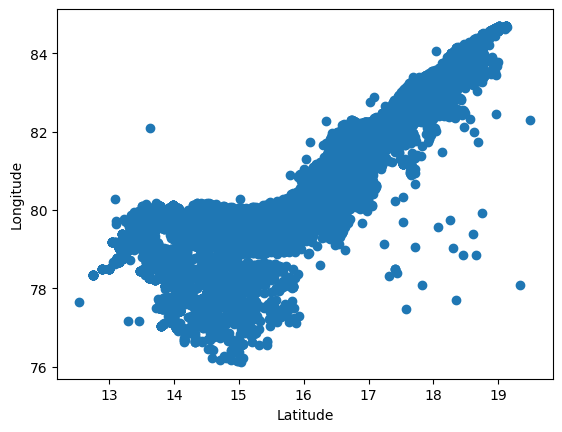

Number of points in cluster 1: 3276
Number of points in cluster 2: 1948
Number of points in cluster 3: 2203
Number of points in cluster 4: 1708
After K means clustering:


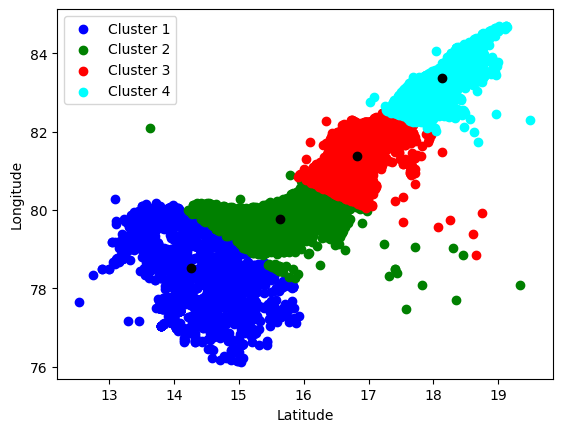

Number of iterations: 38
The centroids are: [[14.26914717556166, 78.52120179400202], [15.632290055102665, 79.7758431769251], [16.828097177335486, 81.38138324756251], [18.133610885199083, 83.35386007714261]]


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

df=pd.read_csv("clustering_data.csv",low_memory=False)
k=4  #Value of k for k-means clustering
df=df.loc[df['StateName']=='ANDHRA PRADESH']  #Filtering the dataframe, for information on homestate, Andhra Pradesh
df=df.dropna()
lon_min_value=76   #Maximum and minimum values of Latitudes and Longitudes
lon_max_value=86
lat_min_value=12
lat_max_value=20

x=np.array(df['Latitude'],dtype='float')

y=np.array(df['Longitude'],dtype='float')

df = df.loc[((x > lat_min_value) & (x< lat_max_value)) & ((y > lon_min_value) & (y < lon_max_value))]  #Filtering the dataframe with respect to the range of latitudes and longitudes, for information on Andhra Pradesh

#Arrays for x and y coordinates with respect to the latitudes and the longitudes
x=np.array(df['Latitude'],dtype='float')
y=np.array(df['Longitude'],dtype='float')

plt.scatter(x,y)   #Plotting the coordinates
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()  #Show the figure

fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', hover_name='District')
fig.update_geos(
    # Define a custom bounding box for Andhra Pradesh
    lonaxis_range=[lon_min_value, lon_max_value],
    lataxis_range=[lat_min_value, lat_max_value],
)

# Show the figure
fig.show()



data_points = [(x,y) for x,y in zip(x,y)]  #Take data points to be an amalgam of all points



mappings= {}  #Initialise an empty dictionary
for index in range(len(data_points)):
  mappings[data_points[index]] = 0 #Initialise keys of the dictionary mappings to be values of the list data_points

max_iters=10_000  #Maximum number of iterations
centroids=[]


for i in range(k):
  centroids.append([np.random.uniform(lat_min_value, lat_max_value),np.random.uniform(lon_min_value, lon_max_value)])  #Intialise centroids as random points in the region

for iter in range(max_iters):
  num_points_updated = 0  #Initialise number of points updated to be 0 and that of new centriods to [0,0]
  new_centroids = []
  num=[0]*k  #Initialise number of points in each cluster to be 0
  for i in range(k):
    new_centroids.append([0,0])


  for index in range(len(data_points)):

    distances = [np.linalg.norm(np.array((data_points[index])) - np.array(centroid)) for centroid in centroids] #Calculate the distances between each of the point from every centroid
    cluster = np.argmin(distances) #Find the cluster with the minimum distance
    new_centroids[cluster][0] += data_points[index][0] #Sum of the x coordinates
    new_centroids[cluster][1] += data_points[index][1] #Sum of the y coordinates
    if mappings[data_points[index]] != cluster:
        num_points_updated += 1  #Increment number of points updated
        mappings[data_points[index]]= cluster  #Update the cluster of the point
    num[cluster] += 1  #Increment number of points in the cluster
  for i in range(k):
   if num[i]!=0:
      new_centroids[i][0]/=num[i] #Division by the number of points in the cluster for the mean
      new_centroids[i][1]/=num[i]
   else:
      new_centroids[i]=[np.random.uniform(lat_min_value, lat_max_value),np.random.uniform(lon_min_value, lon_max_value)]  #If the number of points in the cluster is 0, retain the centroid coordinates, instead of having [0,0]

   centroids=new_centroids
  current_iters=iter+1  #As value of iter starts from 0 in the first iteration, whose corresponding current_iter value should be 1



  if num_points_updated==0:  #Stop iterations if no point has been updated
      break

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black','pink']
for i in range(k):
  cluster_x=[key[0] for key, value in mappings.items() if value == i]  #x coordinates of data points in cluster i
  cluster_y=[key[1] for key, value in mappings.items() if value == i]  #y coordinates of data points in cluster i
  plt.scatter(cluster_x,cluster_y,color=colors[i], label=f'Cluster {i+1}')  #Plotting the different clusters in different colors
  plt.scatter(centroids[i][0],centroids[i][1],color='k')
  print(f'Number of points in cluster {i+1}: {num[i]}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
print('After K means clustering:')
plt.legend()
plt.show()  #Show the figure after clustering
print(f'Number of iterations: {current_iters}')
print('The centroids are:',centroids)

